
# Домашнее задание №1
## **Первичный анализ датасета**
#### Выполнил: Артамонов Д., МАГ ИАД 2020
https://www.kaggle.com/gauravdesurkar/lt-vehicle-loan-default-prediction

In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

### Описание задачи

Задача состоит в разработке модели для оценки кредитного риска. А именно для предсказания возможности невыплаты заёмщика по автокредиту в первый ежемесячный платёж (EMI) в установленный срок.   

In [2]:
data_path = 'VehicleLoanDefaultPrediction'

In [3]:
data = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))
test_lbl_df= pd.read_csv(os.path.join(data_path, 'sample_submission.csv')) # test labels are stored in another file
test_data = pd.merge(test_df, test_lbl_df, how='inner', on='UniqueID') # join labels with test data

In [4]:
data.head(7)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [5]:
test_data.head(3)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1,0
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [6]:
print(f'Размер обучающей выборки: {data.shape[0]}')
print(f'Размер тестовой выборки: {test_data.shape[0]}')

Размер обучающей выборки: 233154
Размер тестовой выборки: 112392


### Описание признаков

В датасете представлены различные признаки: информация о заёмщике, кредите, а также оценка клиента бюро и информация о других кредитах заёмщика

| Призак                      | Описание                                                                        |
|-------------------------------------|------------------------------------------------------------------------------------|
| UniqueID                            | ID покупателя                                                      |
| loan_default                        | Невыплата первого ежемесячного платежа в срок                             |
| disbursed_amount                    | Сумма выданного кредита                                                          |
| asset_cost                          | Стоимость актива                                                                |
| ltv                                 | Отношение заёма к стоимости актива                                                        |
| branch_id                           | Филиал, в котором был выдан кредит                                               |
| supplier_id                         | Автосалон, у которого был выдан заем                                        |
| manufacturer_id                     | Производитель авто(Hero, Honda, TVS etc.)                                        |
| Current_pincode                     | Текущий пин-код клиента                                                   |
| Date.of.Birth                       | Дата рождения покупателя                                                      |
| Employment.Type                     | Тип занятости клиента (оплачиваемый / самозанятый)                           |
| DisbursalDate                       | Дата выплаты                                                              |
| State_ID                            | ID Состояния выплаты                                                              |
| Employee_code_ID                    | ID сотрудника организации, зарегистрировавший выплату                         |
| MobileNo_Avl_Flag                   | Предоставлен ли номер телефона                       |
| Aadhar_flag                         | Предоставлен ли aadhar (паспорт в Индии)                           |
| PAN_flag                            | Предоставлен ли Номер Счёт                                |
| VoterID_flag                        | Предоставлен ли Voter ID (форма удостоверения личности)                             |
| Driving_flag                        | Предоставлено ли водительская лицензия (driving licence)                               |
| Passport_flag                       | Предоставлен ли паспорт                           |
| PERFORM_CNS.SCORE                   | Оценка бюро                                                                      |
| PERFORM_CNS.SCORE.DESCRIPTION       | Описание оценки бюро                                                           |
| PRI.NO.OF.ACCTS                     | Количество кредитов, взятых клиентом на момент выдачи            |
| PRI.ACTIVE.ACCTS                    | Число активных займов, взятых клиентом на момент выдачи            |
| PRI.OVERDUE.ACCTS                   | Число непогашенных счетов на  момент выдачи                              |
| PRI.CURRENT.BALANCE                 | Непогашенная сумма активных займов на момент выплаты |
| PRI.SANCTIONED.AMOUNT               | Общая сумма, которая была санкционирована для всех кредитов на момент выдачи     |
| PRI.DISBURSED.AMOUNT                | Общая сумма, которая была выплачена по всем займам на момент выдачи     |
| SEC.NO.OF.ACCTS                     | Общая сумма кредитов, взятых клиентом на момент выдачи            |
| SEC.ACTIVE.ACCTS                    | Число активных займов, взятых клиентом на момент выдачи           |
| SEC.OVERDUE.ACCTS                   | Число непогашенных счетов на  момент выдачи                             |
| SEC.CURRENT.BALANCE                 | Общая сумма, которая была санкционирована для всех кредитов на момент выдачи |
| SEC.SANCTIONED.AMOUNT               | Общая сумма, которая была санкционирована для всех кредитов на момент выдачи |
| SEC.DISBURSED.AMOUNT                | Общая сумма, которая была выплачена по всем займам на момент выдачи  |
| PRIMARY.INSTAL.AMT                  | Ежемесячный платёж по первичной ссуде                                                    |
| SEC.INSTAL.AMT                      | Ежемесячный платёж по вторичной ссуде                                                     |
| NEW.ACCTS.IN.LAST.SIX.MONTHS        | Новые ссуды, взятые клиентом за последние 6 месяцев до выплаты            |
| DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS | Невыплата по кредитам за последние 6 месяцев                                              |
| AVERAGE.ACCT.AGE                    | Средний срок владения ссудой                                                               |
| CREDIT.HISTORY.LENGTH               | Время с момента первой ссуды                                                          |
| NO.OF_INQUIRIES                     | Запросы клиентов по кредитам                                            |

Очень много непонятных признаков. Главное не пугаться 😬

Первая группа признаков - информация о заёмщике и кредите

In [7]:
loanee_features = data.columns[:19]
data[loanee_features].head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,16-09-18,6,1998,1,1,0,0,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,05-09-18,6,1998,1,1,0,0,0,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,16-09-18,6,1998,1,0,0,1,0,0


Признки **Flag** обозначает, были ли предназначены те или иные данные или нет. Признаки **ID** - уже закодированные категориальные признаки. Большая часть выглядит как дополнительная информация о заёме, которую сложно использовать в модели, например *UniqueID*. С другой стороны, *manufacturer_id* - ID модели автомобиля, могут быть полезны. К Жаль, что на Kaggle нет информации, какой марке соответствует ID 😃

In [8]:
print(f'Всего марок машин: {len(data["manufacturer_id"].unique())}')

Всего марок машин: 11


Распределения ID-признаков. Хотя у нас нет расшифровки ID, можно предположить, что марка машины, а также автосалон, в котором был выдан кредит, как-то влияют предсказания.

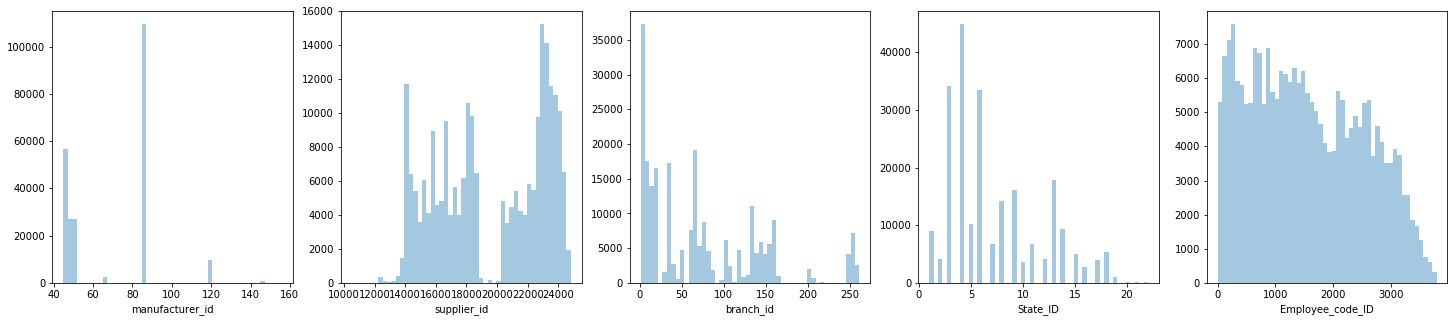

In [9]:
fig, axs = plt.subplots(ncols=5,figsize=(25,5))
sns.distplot(data['manufacturer_id'],kde=False, ax=axs[0])
sns.distplot(data['supplier_id'],kde=False, ax=axs[1])
sns.distplot(data['branch_id'],kde=False, ax=axs[2])
sns.distplot(data['State_ID'],kde=False, ax=axs[3])
sns.distplot(data['Employee_code_ID'],kde=False, ax=axs[4])

plt.show()

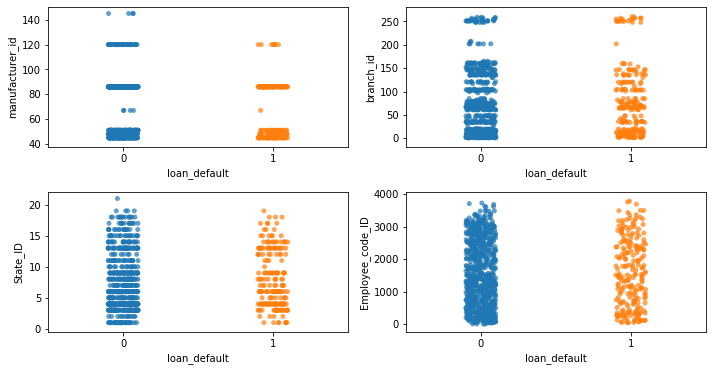

In [10]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(421)
g = sns.catplot(y="manufacturer_id", x="loan_default", jitter=True, data=data.iloc[random_subset], alpha = 0.7,ax=ax1)
ax2 = fig.add_subplot(422)
sns.catplot(y="branch_id", x="loan_default", jitter=True, data=data.iloc[random_subset], alpha = 0.7,ax=ax2)
ax3 = fig.add_subplot(423)
g = sns.catplot(y="State_ID", x="loan_default", jitter=True, data=data.iloc[random_subset], alpha = 0.7, ax=ax3)
ax4 = fig.add_subplot(424)
sns.catplot(y="Employee_code_ID", x="loan_default", jitter=True, data=data.iloc[random_subset], alpha = 0.7, ax=ax4)

for i in range(2,6):
    plt.close(i)
plt.tight_layout()
plt.show()

Посмотрим на матрицу корреляций для флагов

А вот дополнительную информацию в виде ID клиента, его пинкода или состояния выплаты можно исключить из датасета:

In [11]:
data = data.drop(columns=['UniqueID', 'Current_pincode_ID', 'State_ID'])

Бинарные признаки (флаги) тоже выглядят как дополнительная информация

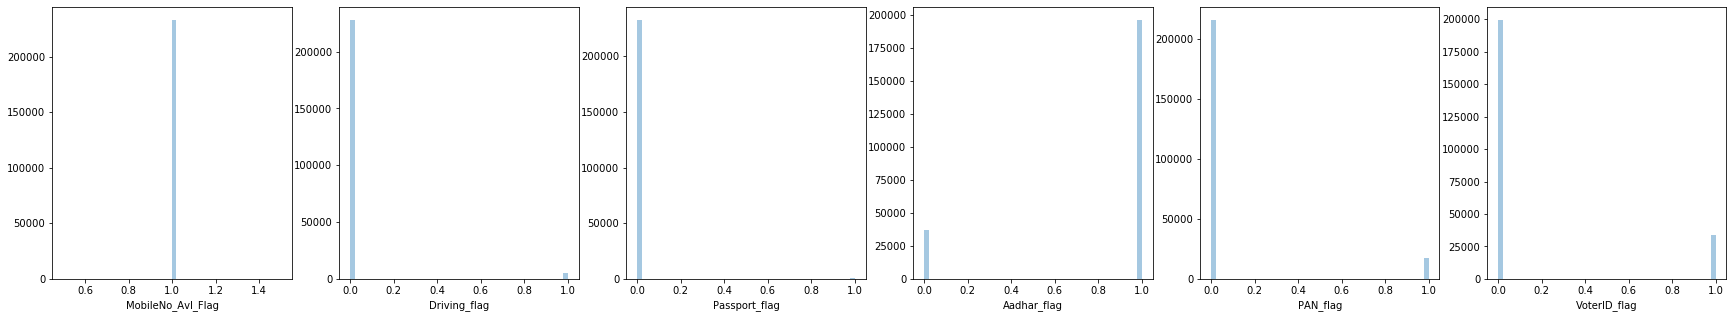

In [12]:
fig, axs = plt.subplots(ncols=6,figsize=(30,5))
sns.distplot(data['MobileNo_Avl_Flag'],kde=False, ax=axs[0])
sns.distplot(data['Driving_flag'],kde=False, ax=axs[1])
sns.distplot(data['Passport_flag'],kde=False, ax=axs[2])
sns.distplot(data['Aadhar_flag'],kde=False, ax=axs[3])
sns.distplot(data['PAN_flag'],kde=False, ax=axs[4])
sns.distplot(data['VoterID_flag'],kde=False, ax=axs[5])


plt.show()

Посмотрим на матрицу корреляций для флагов

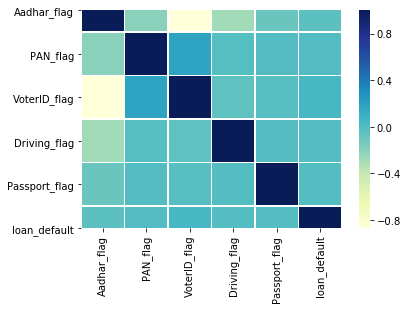

In [13]:
corr = data[[ 'Aadhar_flag', 'PAN_flag','VoterID_flag', 'Driving_flag', 'Passport_flag', 'loan_default']].corr()
sns.heatmap(corr, square=True, linewidths=.5,cmap="YlGnBu")
plt.show()

Предоставляют либо VoterID, либо Aadhar. С loan_default нет никаких явных корреляций

Рассмотрим признак Employment.Type. Он принимает 3 значения: Self employed, Salaried или none. Это единственный признак, у которого есть значения none:

In [14]:
nan_columns = data.isna().any()
null_columns = data.isnull().any()

columns_with_nan = data.columns[nan_columns].tolist()
columns_with_null = data.columns[null_columns].tolist()

print(f'Признаки с none: {columns_with_nan}')
print(f'Признаки с null: {columns_with_null}')

Признаки с none: ['Employment.Type']
Признаки с null: ['Employment.Type']


Скорее всего это свидетельствует об отсутствие работы

Закодируем признак с помощью sklearn

In [15]:
data['Employment.Type'] = data['Employment.Type'].astype(str)

In [16]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data['Employment.Type'] = lb_make.fit_transform(data['Employment.Type'])

In [17]:
lb_make.classes_

array(['Salaried', 'Self employed', 'nan'], dtype=object)

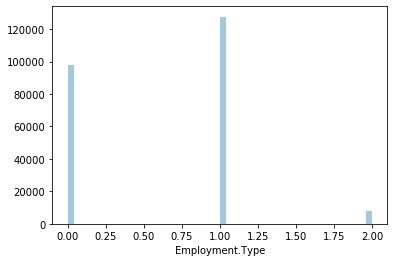

In [18]:
sns.distplot(data['Employment.Type'],kde=False)
plt.show()

Большинство - самозанятые

Единственные **числовые признаки** - *disbursed_amount* (Сумма выданного кредита), *asset_cost* (Стоимость актива) и *ltv* (Отношение заёма к стоимости актива). Почему-то действительное отношение *disbursed_amount* / *asset_cost* получается меньше чем признак *itv* в среднем на...

In [19]:
np.mean(data.iloc[random_subset]['disbursed_amount'] / data.iloc[random_subset]['asset_cost'] * 100 -  data.iloc[random_subset]['ltv'])

-2.2667582820703984

Посмотрим на основные статистики

In [20]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # format float output
data[['asset_cost', 'disbursed_amount','ltv']].describe()

,asset_cost,disbursed_amount,ltv
count,233154.000,233154.000,233154.000
mean,75865.068,54356.994,74.747
std,18944.781,12971.314,11.457
min,37000.000,13320.000,10.030
25%,65717.000,47145.000,68.880
50%,70946.000,53803.000,76.800
75%,79201.750,60413.000,83.670
max,1628992.000,990572.000,95.000


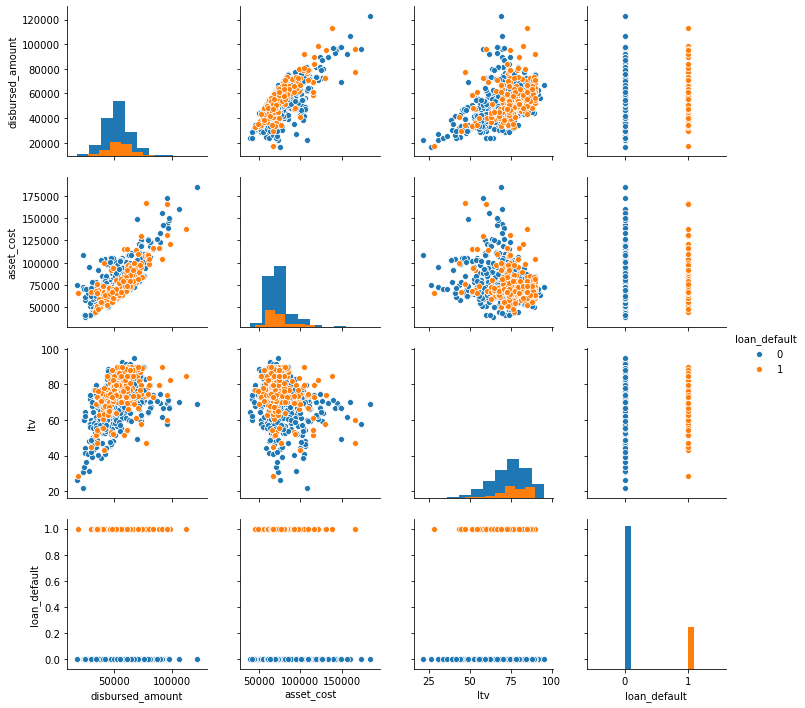

In [21]:
sns.pairplot(data.iloc[random_subset][['disbursed_amount', 'asset_cost','ltv','loan_default']], hue='loan_default', diag_kind='hist')
plt.show()

Каких-то явных закономрностей не наблюдается

Посмотрим на матрицу корреляций для числовых признаков

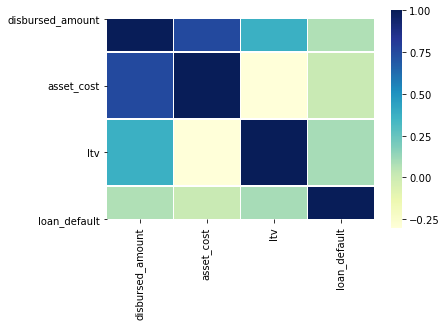

In [22]:
corr = data[['disbursed_amount', 'asset_cost','ltv','loan_default']].corr()
sns.heatmap(corr, square=True, linewidths=.5,cmap="YlGnBu")
plt.show()

С loan_default никаких явный корреляций нет

У нас есть и 2 **признака-даты**: *Date.of.Birth*, по которому мы можем вычислить возраст заёмщика и *DisbursalDate* - дата выплаты, которая выглядит как дополнительная информация о заёме. С другой стороны, вместо вычисления возраста (для которого нужно знать дату займа) мы можем оставить только год рождения

In [23]:
data = data.drop(columns=['DisbursalDate'])

In [24]:
data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'])

In [25]:
data['Date.of.Birth'].apply(lambda x: x.year).unique()

array([1984, 1985, 1993, 1977, 1990, 1988, 1989, 1991, 2068, 1979, 1974,
       1973, 1994, 1976, 1983, 1980, 1978, 1986, 1972, 2069, 2066, 1996,
       1982, 1971, 1995, 2064, 2067, 1970, 1997, 1998, 1999, 1975, 1981,
       1987, 2062, 2065, 2057, 2063, 2060, 1992, 2055, 2059, 2058, 2056,
       2061, 2000, 2054, 2049])

Функция конвертации подложила нам 🐷. Нужна дополнительная фильтрация. При этом важно 2000 год не сделать 1900-м

In [26]:
data['Date.of.Birth'] = data['Date.of.Birth'].apply(lambda x: x.replace(year=x.year-100) if x.year>2000 else x.replace(year=x.year))

In [27]:
data['Date.of.Birth'].apply(lambda x: x.year).unique()

array([1984, 1985, 1993, 1977, 1990, 1988, 1989, 1991, 1968, 1979, 1974,
       1973, 1994, 1976, 1983, 1980, 1978, 1986, 1972, 1969, 1966, 1996,
       1982, 1971, 1995, 1964, 1967, 1970, 1997, 1998, 1999, 1975, 1981,
       1987, 1962, 1965, 1957, 1963, 1960, 1992, 1955, 1959, 1958, 1956,
       1961, 2000, 1954, 1949])

Избавимся от дат и оставим только годы

In [28]:
data['Date.of.Birth'] = data['Date.of.Birth'].apply(lambda x: x.year)

In [29]:
data[['Date.of.Birth']].head(10)

,Date.of.Birth
0,1984
1,1985
2,1985
3,1993
4,1977
5,1990
6,1988
7,1989
8,1991
9,1968


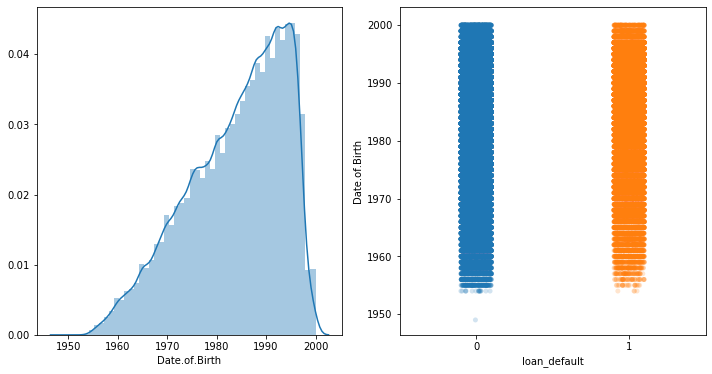

In [30]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)
g = sns.distplot(data['Date.of.Birth'],ax=ax1)
ax2 = fig.add_subplot(222)
sns.catplot(y="Date.of.Birth", x="loan_default", jitter=True, data=data, alpha = 0.2,ax=ax2)

for i in range(2,3):
    plt.close(i)
plt.tight_layout()
plt.show()

Судя по картинкам, бывает не платит и  👴🏻, и  🧑🏻

#### Что знает бюро?

У бюро есть свой собственный скоринг клиента. В зависимости от оценки определяется класс заёмщика:

In [31]:
сns_data = pd.read_csv(os.path.join(data_path, 'train.csv'))[['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION']] 

In [32]:
сns_data.head(20)

,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION
0,0,No Bureau History Available
1,598,I-Medium Risk
2,0,No Bureau History Available
3,305,L-Very High Risk
4,0,No Bureau History Available
5,825,A-Very Low Risk
6,0,No Bureau History Available
7,17,Not Scored: Not Enough Info available on the c...
8,718,D-Very Low Risk
9,818,A-Very Low Risk


Посмотрим, в каких границах оценок определяются категории:

In [33]:
cns_data_mean = сns_data.groupby('PERFORM_CNS.SCORE.DESCRIPTION').mean()

In [34]:
cns_data_max = сns_data.groupby('PERFORM_CNS.SCORE.DESCRIPTION').max()

In [35]:
cns_data_min = сns_data.groupby('PERFORM_CNS.SCORE.DESCRIPTION').min()

In [36]:
cns_data_stats = reduce(lambda left,right: pd.merge(left,right,on='PERFORM_CNS.SCORE.DESCRIPTION'), [cns_data_mean, cns_data_min, cns_data_max])
cns_data_stats.rename(columns={
    'PERFORM_CNS.SCORE_x':'PERFORM_CNS.SCORE_mean',
    'PERFORM_CNS.SCORE_y': 'PERFORM_CNS.SCORE_min',
    'PERFORM_CNS.SCORE': 'PERFORM_CNS.SCORE_x_max'
},inplace=True)


In [37]:
cns_data_stats.sort_values(by='PERFORM_CNS.SCORE_mean', ascending=False)

,PERFORM_CNS.SCORE_mean,PERFORM_CNS.SCORE_min,PERFORM_CNS.SCORE_x_max
PERFORM_CNS.SCORE.DESCRIPTION,,,
A-Very Low Risk,827.663,806,890
B-Very Low Risk,774.184,761,805
C-Very Low Risk,741.899,736,760
D-Very Low Risk,715.958,706,735
E-Low Risk,691.517,681,705
F-Low Risk,666.064,651,680
G-Low Risk,640.854,631,650
H-Medium Risk,617.032,601,630
I-Medium Risk,586.833,571,600


In [38]:
pd.read_csv(os.path.join(data_path, 'train.csv')).groupby('PERFORM_CNS.SCORE.DESCRIPTION').count().sort_values(by='UniqueID')['UniqueID']

PERFORM_CNS.SCORE.DESCRIPTION
Not Scored: More than 50 active Accounts found                  3
Not Scored: Only a Guarantor                                  976
L-Very High Risk                                             1134
Not Scored: No Updates available in last 36 months           1534
Not Scored: No Activity seen on the customer (Inactive)      2885
Not Scored: Not Enough Info available on the customer        3672
J-High Risk                                                  3748
Not Scored: Sufficient History Not Available                 3765
G-Low Risk                                                   3988
I-Medium Risk                                                5557
E-Low Risk                                                   5821
H-Medium Risk                                                6855
K-High Risk                                                  8277
F-Low Risk                                                   8485
M-Very High Risk                              

Видно, что для большинства клиентов у бюро нет оценки. Большая часть тех, у кого она есть из групп низкого риска

В качестве признака для модели мы можем использовать  как PERFORM_CNS.SCORE, так и закодированные категории PERFORM_CNS.SCORE.DESCRIPTION. В моделе будем использовать PERFORM_CNS.SCORE

In [39]:
data.drop(columns=['PERFORM_CNS.SCORE.DESCRIPTION'], inplace=True)

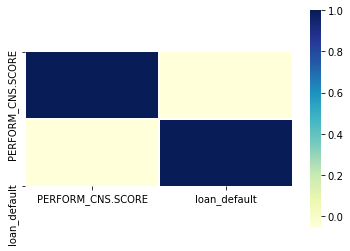

In [40]:
corr = data[['PERFORM_CNS.SCORE','loan_default']].corr()
sns.heatmap(corr, square=True, linewidths=.5,cmap="YlGnBu")
plt.show()

Коррляции тоже нет

#### Кредитная история заёмщика

Следующие две группы признаков - кредитная история заёмщика. Признаки с префиксом PRI (Primary) соответствуют счетам (заёмам), взятых клиентом для своих собственных нужд.  Вторая группа - SEC(secondary) - содержат информацию о кредитах, в которых клиент выступил в качестве со-заявителя или поручителя

Признаки из этих двух групп содержат следющую информацию (на момент выдачи кредита):
* NO.OF.ACCTS - общее число взятых кредитов 
* ACTIVE.ACCTS - число непогашенных заёмов
* OVERDUE.ACCTS - количество просроченных счетов
* CURRENT.BALANCE- общая сумма непогашенных заёмов
* SANCTIONED.AMOUNT - общая сумма санкционированных займов
* DISBURSED.AMOUNT - общая сумма, выплаченная по все займам
* INSTAL.AMT - ежемесячный платёж по ссуде

In [41]:
data[['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT']].tail(10)

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT
233144,0,0,0,0,0,0,0
233145,7,4,0,13064,85629,80226,1672
233146,2,2,0,7001,14839,14839,0
233147,4,4,0,201422,276624,237977,0
233148,0,0,0,0,0,0,0
233149,4,3,0,390443,416133,416133,4084
233150,1,0,0,0,0,0,1565
233151,0,0,0,0,0,0,0
233152,0,0,0,0,0,0,0
233153,0,0,0,0,0,0,0


In [42]:
data[['SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT']].tail(10)

,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,SEC.INSTAL.AMT
233144,0,0,0,0,0,0,0
233145,0,0,0,0,0,0,0
233146,0,0,0,0,0,0,0
233147,0,0,0,0,0,0,0
233148,0,0,0,0,0,0,0
233149,0,0,0,0,0,0,0
233150,0,0,0,0,0,0,0
233151,0,0,0,0,0,0,0
233152,0,0,0,0,0,0,0
233153,0,0,0,0,0,0,0


In [43]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # format float output
data[['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT']].describe()

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT
count,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000
mean,2.441,1.040,0.157,165900.077,218503.855,218065.899,13105.482
std,5.217,1.941,0.549,942273.582,2374794.126,2377743.846,151367.905
min,0.000,0.000,0.000,-6678296.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,3.000,1.000,0.000,35006.500,62500.000,60800.000,1999.000
max,453.000,144.000,25.000,96524920.000,1000000000.000,1000000000.000,25642806.000


Судя по статистикам больше чем для половины клиентов это первый займ.

In [44]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # format float output
data[['SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','SEC.INSTAL.AMT']].describe()

,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,SEC.INSTAL.AMT
count,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000
mean,0.059,0.028,0.007,5427.793,7295.923,7179.998,323.268
std,0.627,0.316,0.111,170236.995,183155.993,182592.500,15553.691
min,0.000,0.000,0.000,-574647.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,52.000,36.000,8.000,36032852.000,30000000.000,30000000.000,4170901.000


В качестве поручителей выступило менее 75% всех клиентов

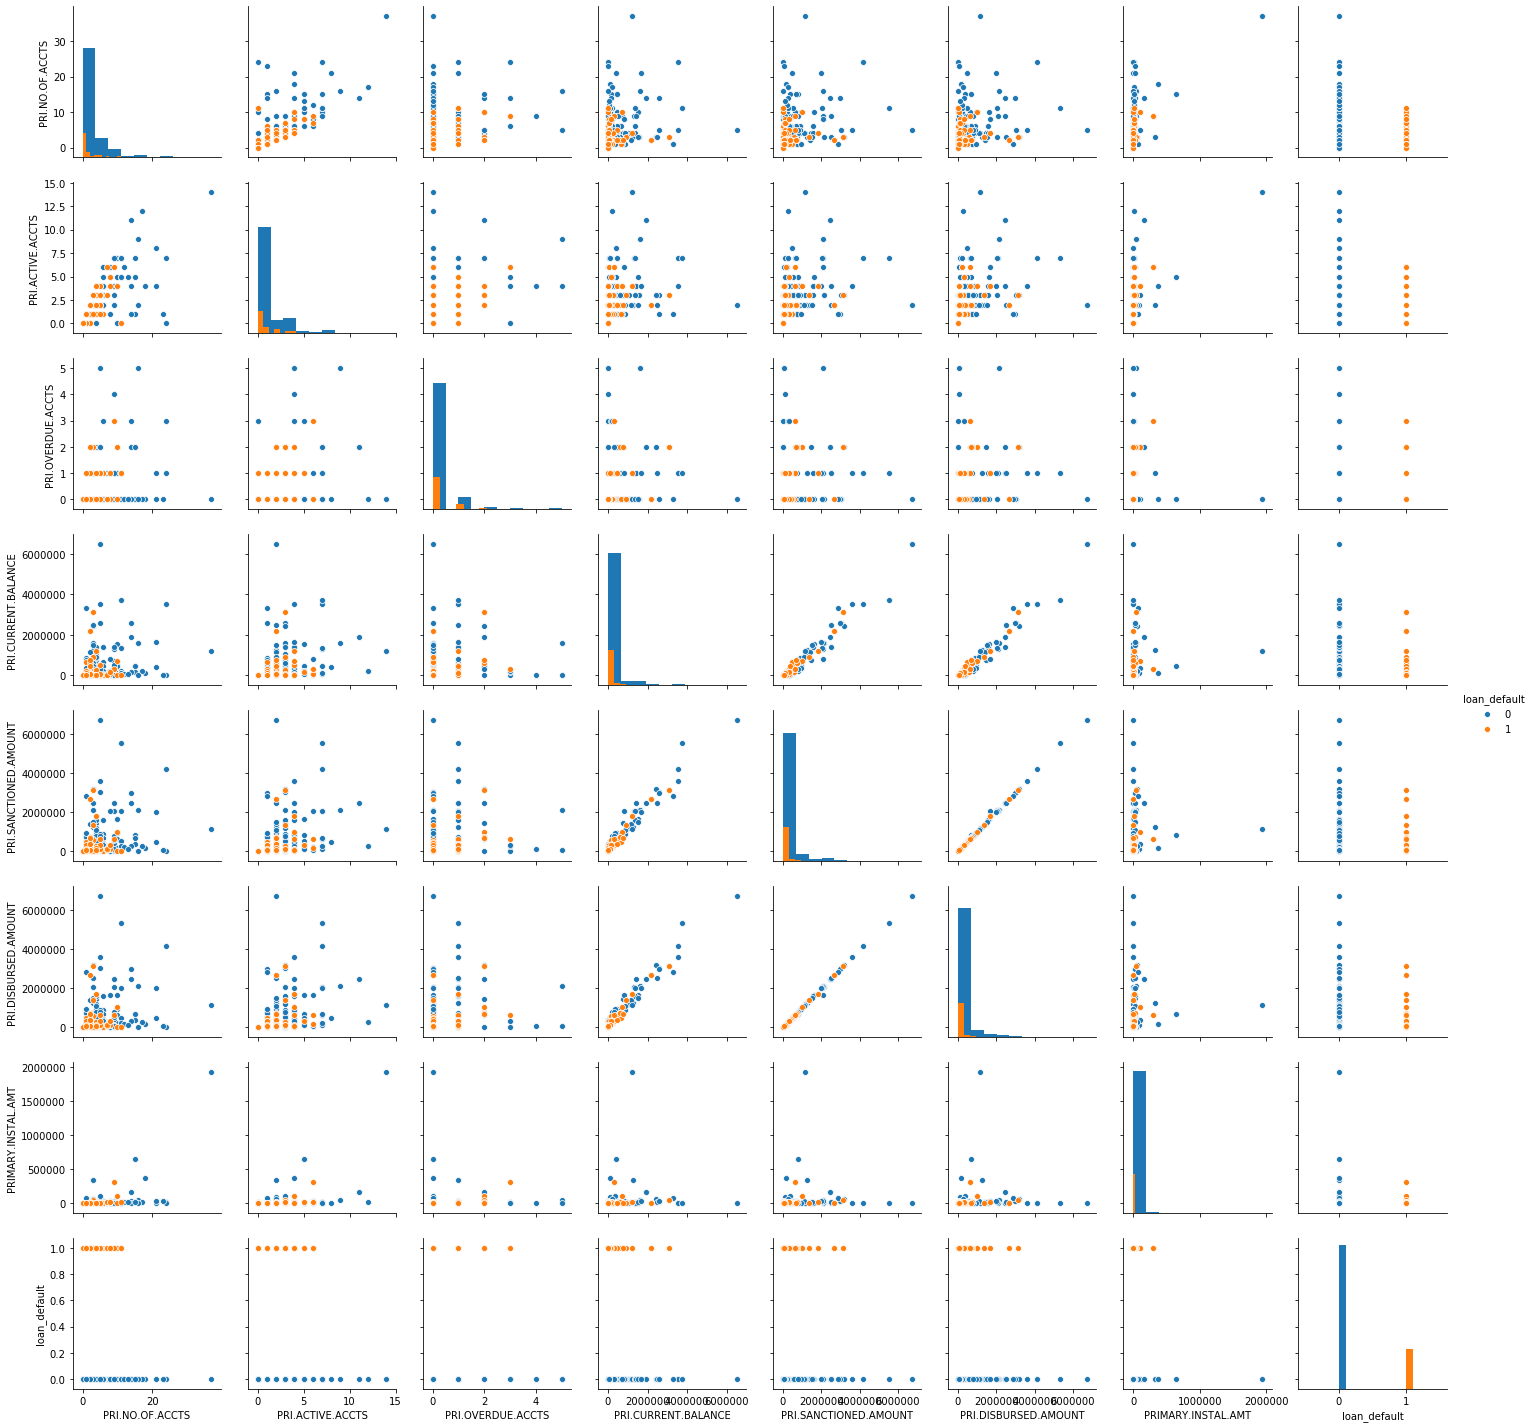

In [45]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=500, replace=False)
sns.pairplot(data.iloc[random_subset]
             [['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','loan_default']], 
             hue='loan_default', diag_kind='hist')
plt.show()

Видно, что CURRENT.BALANCE, SANCTIONED.AMOUNT, DISBURSED.AMOUNT сильно коррелированы. Но это и логично 🤓

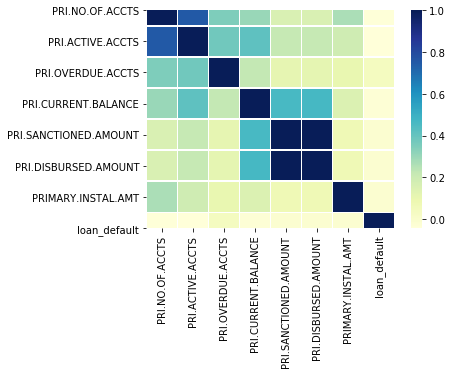

In [46]:
corr = data[['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','loan_default']].corr()
sns.heatmap(corr, square=True, linewidths=.5,cmap="YlGnBu")
plt.show()

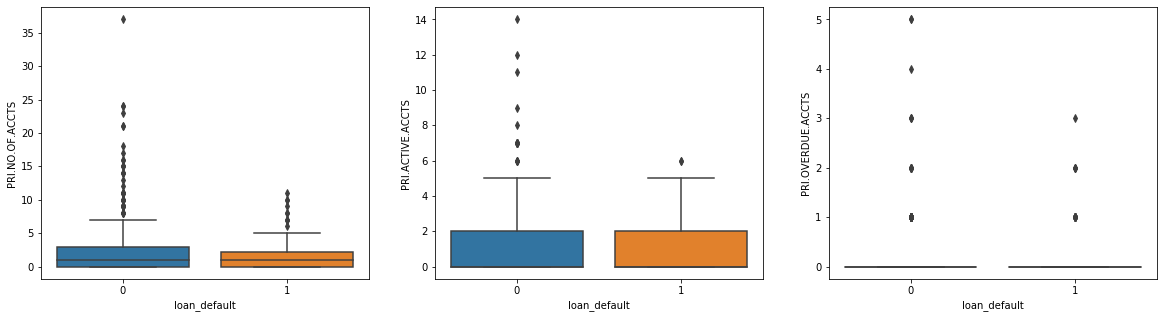

In [47]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.boxplot(y="PRI.NO.OF.ACCTS", x="loan_default", data=data.iloc[random_subset],ax=axs[0])
sns.boxplot(y="PRI.ACTIVE.ACCTS", x="loan_default",  data=data.iloc[random_subset],ax=axs[1])
sns.boxplot(y="PRI.OVERDUE.ACCTS", x="loan_default",  data=data.iloc[random_subset],ax=axs[2])
plt.show()

Последняя група - также данные о кредитной истории, но уже с точки зрения длительности владения кредитом:
* NEW.ACCTS.IN.LAST.SIX.MONTHS - Количество новых заёмов за полгода перед текущим заёмом
* DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS - Невыплаты по кредиту за последние полгода
* AVERAGE.ACCT.AGE - Средний срок владения ссудой
* CREDIT.HISTORY.LENGTH  - Длина кридетной истории (время с момента первой ссуды)
* NO.OF_INQUIRIES - Число запросов клиентов по кредитам ( не совсем понятно что это)

In [48]:
data[['NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES']].head(10)

,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,0,0,0yrs 0mon,0yrs 0mon,0
1,0,1,1yrs 11mon,1yrs 11mon,0
2,0,0,0yrs 0mon,0yrs 0mon,0
3,0,0,0yrs 8mon,1yrs 3mon,1
4,0,0,0yrs 0mon,0yrs 0mon,1
5,0,0,1yrs 9mon,2yrs 0mon,0
6,0,0,0yrs 0mon,0yrs 0mon,0
7,0,0,0yrs 2mon,0yrs 2mon,0
8,0,0,4yrs 8mon,4yrs 8mon,1
9,0,0,1yrs 7mon,1yrs 7mon,0


Признаки 'AVERAGE.ACCT.AGE' и 'CREDIT.HISTORY.LENGTH' представим как число месяцев с помощью функции

In [49]:
def to_month_num(data, col):
    df_ = data[col].str.extractall('(\d+)').unstack()
    df_.columns = df_.columns.droplevel(0)
    return df_.iloc[:,0].astype(int).mul(12) + df_.iloc[:,1].astype(int)


In [50]:
data['AVERAGE.ACCT.AGE'] = to_month_num(data, 'AVERAGE.ACCT.AGE')
data['CREDIT.HISTORY.LENGTH'] = to_month_num(data, 'CREDIT.HISTORY.LENGTH')

В результате получаем понятные числовые признаки

In [51]:
data[['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']].head(5)

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0,0
1,23,23
2,0,0
3,8,15
4,0,0


In [52]:
data[['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']].describe()

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
count,233154.000,233154.000
mean,8.916,16.252
std,15.106,28.581
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,13.000,24.000
max,369.000,468.000


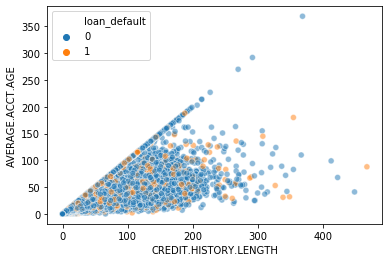

In [53]:
sns.scatterplot(y='AVERAGE.ACCT.AGE', x='CREDIT.HISTORY.LENGTH', hue='loan_default', alpha=0.5, data=data)
plt.show()

### Нормализация

Нормализуем числовые признаки

In [54]:
numeric_features = ['disbursed_amount', 'asset_cost', 'ltv', 'Date.of.Birth','PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH','NO.OF_INQUIRIES' ]


In [55]:
data[numeric_features].head(5)

,disbursed_amount,asset_cost,ltv,Date.of.Birth,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,50578,58400,89.550,1984,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.230,1985,1,1,1,27600,50200,50200,...,0,0,0,1991,0,0,1,23,23,0
2,53278,61360,89.630,1985,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.480,1993,3,0,0,0,0,0,...,0,0,0,31,0,0,0,8,15,1
4,52378,60300,88.390,1977,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
data[numeric_features] = (data[numeric_features] - data[numeric_features].mean(axis = 0))/data[numeric_features].std(axis = 0)

In [57]:
data.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Date.of.Birth,Employment.Type,Employee_code_ID,MobileNo_Avl_Flag,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,-0.291,-0.922,1.292,67,22807,45,0.010,0,1998,1,...,-0.040,-0.039,-0.087,-0.021,-0.400,-0.254,-0.590,-0.569,-0.292,0
1,-0.556,-0.544,-0.132,67,22807,45,0.112,1,1998,1,...,-0.040,-0.039,-0.073,-0.021,-0.400,2.348,0.932,0.236,-0.292,1
2,-0.083,-0.766,1.299,67,22807,45,0.112,1,1998,1,...,-0.040,-0.039,-0.087,-0.021,-0.400,-0.254,-0.590,-0.569,-0.292,0
3,0.243,-0.515,1.199,67,22807,45,0.928,1,1998,1,...,-0.040,-0.039,-0.086,-0.021,-0.400,-0.254,-0.061,-0.044,1.123,1
4,-0.153,-0.822,1.191,67,22807,45,-0.704,1,1998,1,...,-0.040,-0.039,-0.087,-0.021,-0.400,-0.254,-0.590,-0.569,1.123,1


### kNN

In [58]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

Попробуем натренировать классификатор 

In [35]:
X = data.drop('loan_default', axis=1).values
y = data[['loan_default']].values

In [356]:
X.shape

(233154, 35)

Чтобы запустить kNN на всех данных, опретивки не хватило  😃. Построим и протестируем классификатор не выборке

In [59]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=100_000, replace=False)

In [60]:
X = data.drop('loan_default', axis=1).iloc[random_subset].values
y = data[['loan_default']].iloc[random_subset].values

In [95]:
X.shape

(100000, 35)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

In [132]:
kk = [1, 3, 5, 7] + list(range(10, 201, 10))
err_train = []
err_test = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

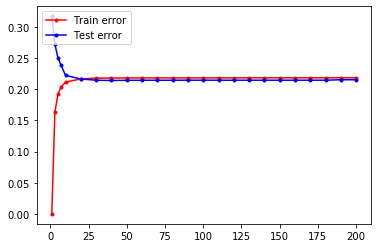

In [133]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.show()

Интересно, уже ничиная  с 25 соседей, обе ошибки застыли на значении 0.20 - 0.22. Скорее всего, классификатор показывает такую ошибку из-за несбалансированности классов

In [74]:
print(f'Из {len(y_train)} элементов тренировочной выборке, число объектов класса 1 равно {y_train.sum()}. Соотношение {y_train.sum()/len(y_train)}')

Из 80000 элементов тренировочной выборке, число объектов класса 1 равно 17167. Соотношение 0.2145875


In [76]:
print(f'Из {len(y_test)} элементов тестовой выборке, число объектов класса 1 равно {y_test.sum()}. Соотношение {y_test.sum()/len(y_test)}')

Из 20000 элементов тестовой выборке, число объектов класса 1 равно 4413. Соотношение 0.22065


### PCA

Применим PCA для понижения размерности

In [64]:
from sklearn.decomposition import PCA

In [146]:
pca = PCA(n_components=2)

In [147]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Посмотрим на доли объяснённой дисперсии

In [148]:
print(pca.explained_variance_ratio_)

[0.92026945 0.07082189]


и на сингулярныные числа

In [149]:
print(pca.singular_values_)

[989034.50980422 274370.67994945]


Судя по значениям. можно было проецировать и на прямую

In [150]:
pca_X_train = pca.transform(X_train)

In [180]:
x_shape = pca_X_train.shape

In [175]:
pca_data=pd.DataFrame(np.concatenate([pca_X_train, y_train.reshape(x_shape[0],1)],axis=1), columns=['feature1', 'feature2', 'loan_default'])
pca_data['loan_default'] = pca_data['loan_default'].astype(int)

In [176]:
pca_data.head()

,feature1,feature2,loan_default
0,2492.297,-862.011,0
1,-3386.474,896.785,0
2,-3138.240,-893.818,0
3,-2333.996,-1181.214,0
4,1953.726,-759.434,1


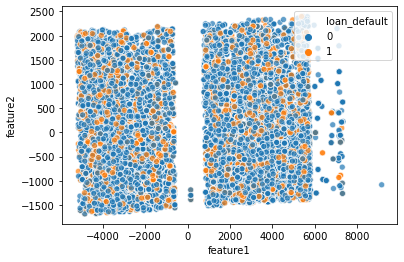

In [183]:
sns.scatterplot(x='feature1', y='feature2', data=pca_data, hue='loan_default', alpha=0.7)
plt.show()

Применим SVM

In [63]:
from sklearn import svm

In [185]:
clf = svm.SVC()
clf.fit(pca_X_train, y_train)

/home/friday/anaconda3/envs/hoodoo/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Точность на тренировочной выборке:

In [190]:
y_pred = clf.predict(pca_X_train)
np.mean(y_pred != y_train)

0.1753125

Точность на тестовой выборке:

In [186]:
y_pred = clf.predict(pca.transform(X_test))

In [189]:
np.mean(y_pred != y_test)

0.2296

Посмотрим на PCA с разным числом комопнентов

In [65]:
svc_models={}
err_train ={}
err_test = {}

In [66]:
for n in tqdm([3,5,7]):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    pca_X_train = pca.transform(X_train)
    pca_X_test= pca.transform(X_test)
    
    clf = svm.SVC()
    clf.fit(pca_X_train, y_train)
    
    svc_models[n] = clf
    err_test[n] = np.mean(clf.predict(pca_X_test) != y_test)
    err_train[n] = np.mean(clf.predict(pca_X_train) != y_train)

  0%|          | 0/3 [00:00<?, ?it/s]/home/friday/anaconda3/envs/hoodoo/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
 33%|███▎      | 1/3 [09:15<18:31, 555.92s/it]/home/friday/anaconda3/envs/hoodoo/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
 67%|██████▋   | 2/3 [18:44<09:19, 559.62s/it]/home/friday/anaconda3/envs/hoodoo/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled featu

In [67]:
err_train

{3: 0.1164625, 5: 0.1172375, 7: 0.115575}

In [68]:
err_test

{3: 0.2375, 5: 0.24, 7: 0.2392}

In [ ]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
fig = plt.figure(figsize=(10,10))


g = sns.distplot(data['Date.of.Birth'],ax=ax1)
ax2 = fig.add_subplot(222)
sns.catplot(y="Date.of.Birth", x="loan_default", jitter=True, data=data, alpha = 0.2,ax=ax2)

for i in range(2,3):
    plt.close(i)
plt.tight_layout()
plt.show()

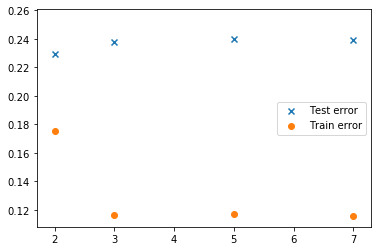

In [95]:

plt.scatter(y=[0.2296,0.2375, 0.24, 0.2392], x=[2,3,5,7],marker='x',label='Test error')
plt.scatter(y=[0.1753125,0.1164625, 0.1172375, 0.115575], x=[2,3,5,7],marker='o',label='Train error')
plt.legend()

plt.show()

На тестовой выборке ошибка для разного чилса компонент не сильно отличается